# Exercise 04 - Pressure Transducer
\- Gugliemo Grillo

<div>
<center>
    <img src="https://i.imgur.com/CxYNAYL.png" width="700"/>
</center>
</div>

### Transfer function

We call $P_{fb}$ the preassure coming from the output V and passing throught the $-\beta$ stage. the relevant equations of the system are:
\begin{array}{rcl}
P_{fb} &=& - \beta V \\
P_e + P_{fb} &=& P\\
V &=& P \frac{G}{1+ i f/f_0} \\
\end{array}
Solving for $V/P_e$ we obatain:
$$ h(f) = \frac{V}{P_e} = \frac{G_c}{1+G_c \beta} = \frac{G}{1+i f/f_0 + \beta G}$$
where we choose $G_c = \frac{G}{1+if/f_0}$ in order to preserve the canonical gain equation.

In [7]:
# packages used
import scipy.constants
from scipy import signal
from scipy.integrate import quad

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Given constans
OR = 1 # \pm, [Pa], operating range
G = 100 # V/Pa
F0 = 10 # Hz, roll of frequency
BETA = 1 # Pa/V

# Parameters redefinition
Gc = lambda f: G / (1+ 1j * f/F0)
#h = lamda f: Gc(f)/ (1+beta*Gc(f))

# Show value
print("Gain at roll-off frequency {:.5}".format(Gc(F0)) )

Gain at roll of frequency (50-50j)


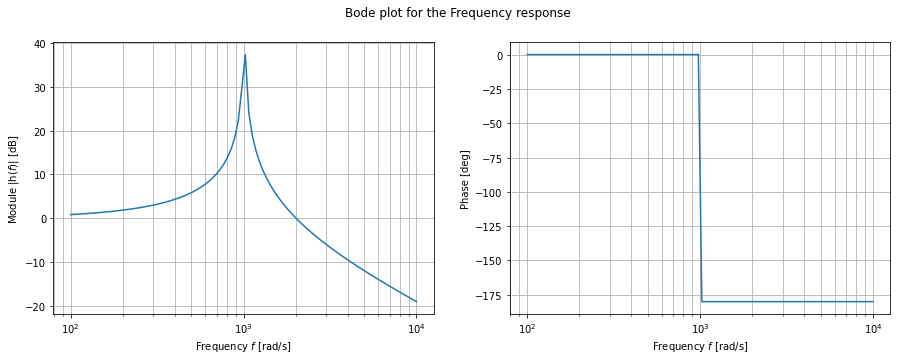

In [10]:
sys = signal.TransferFunction([G], [1j/F0, 1+BETA*G])
w, mag, phase = signal.bode(sys)

# Bode plot
fig, axis = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Bode plot for the Frequency response')

axis[0].plot(w, mag)
axis[0].set_xscale('log')
axis[0].set_xlabel("Frequency $f$ [rad/s]")
axis[0].set_ylabel("Module |h($f$)| [dB]")
axis[0].grid(True, which="both")

axis[1].plot(w, phase)
axis[1].set_xscale('log')
axis[1].set_xlabel("Frequency $f$ [rad/s]")
axis[1].set_ylabel("Phase [deg]")
axis[1].grid(True, which="both")

plt.show()

### Saturation
The operating range of the transducer is $P = \pm 1 Pa$. We will assume all the quantities to be positive. The relations between $P$, $V$ and the input $P_e$ are:
\begin{array}{rcl}
V &=& \frac{G_c}{1+\beta G_c} P_e\\
V &=& \frac{G}{1+i f/f_0} \\
\end{array}
Which lead to:
$$P_e = P \frac{G}{1+i f/f_0} \frac{1+\beta G_c}{G_c} = P G_c \frac{1+\beta G_c}{G_c} = P (1+\beta G_c)$$

We require to stay within 10% of saturation, so that
$$ P_e = \frac{9}{10} (1+\beta G_c) P_M  = \frac{9}{10} \frac{1+i f/f_0 + \beta G}{1+i f/f_0} $$

In [ ]:
# Shall I do a graph?